In this project you will discover how to develop a deep learning model to achieve high performance on the handwritten digit recognition task using the MNIST dataset and build a GUI App based on Tkinter where, you can draw the digits (single as well as multiple) and recognize it straight away by draw a bounding box surrounding each digit.

Problem Statement:

It is easy for the human to perform a task accurately by practicing it repeatedly and memorizing it for the next time. Human brain can process and analyse images easily. Also, recognize the different elements present in the images.

The challenge in handwritten digit recognition is mainly caused by the writing style variations of every single individual. So, it is not easy for the machine to recognize the handwritten digits accurately like the humans do. Hence, robust feature extraction is very important to improve the performance of machines.

MNIST Dataset:

The MNIST dataset (Modified National Institute of Standards and Technology) is a large dataset of handwritten digits that is widely used for training and testing in the field of machine learning and deep learning.

The MNIST dataset contains 60,000 training images and 10,000 testing images of handwritten digits from zero to nine(0 to 9). So, the MNIST dataset has 10 different classes. Each image is represented as a 28×28 matrix where each cell contains grayscale pixel value.

Why deep learning?

Deep learning is a class of machine learning that uses multiple layers to progressively extract higher level features from the input. Therefore, deep learning reduces the task of developing new feature extractor for every problem. This characteristic of Deep Learning is a major step ahead of traditional Machine Learning.

Most modern deep learning models are based on artificial neural networks, specifically, Convolutional Neural Networks (CNN) that we will use in this project.

# Import the libraries

In [5]:
#import libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
import numpy
import pandas as pd

# Load the MNIST dataset

In [6]:
#load dataset directly from keras library
(X_train, y_train), (X_test, y_test) = mnist.load_data()

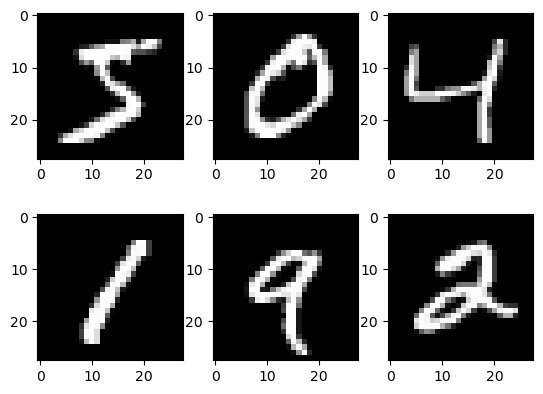

In [7]:
#plot first 6 samples of MNIST training dataset as gray scale image
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(int('23'+str(i+1)))
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))

# Data Preprocess and Normalize

We know that all images (dataset) are represented as a 28×28 matrix containing grayscale pixel values. According to this, the dimension of the training data is (60000,28,28) but the CNN model will require one more dimension so we need to process the data by reshape the matrix to shape (60000,28,28,1).

In [8]:
#reshape format [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

#converts a class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

When using neural network models, It is good to perform some scaling of input values to normalize the pixel values to the range 0 and 1 by dividing each value by the maximum value (Note: The pixel values are gray scale between 0 and 255).

In [9]:
#normalize inputs
X_train = X_train / 255
X_test = X_test / 255

# Create the model

Now we will create a CNN model with a double convolutional layer of the same size 3×3, max pooling layers and fully connected layers. The dropout layer is used to deactivate some of the neurons to reduce overfitting. Finally, the output layer has 10 neurons for the 10 classes. We will then compile the model with the ADAM / ADADELTA optimizer (here Adam).

Convolutional Neural Network (CNN) Model Explanation

A Convolutional Neural Network (CNN) is a type of deep learning model commonly used for image recognition and computer vision tasks. It is designed to automatically and adaptively learn spatial hierarchies of features from input data.

Mathematical Concept of CNN Model:

Convolution Operation:

The core operation in a CNN where a filter (kernel) is applied to the input image to extract features.

Mathematically, the convolution operation is defined as:

S(i,j) = (I*K)(i,j) = ∑_m ∑_n I(m,n).K(i-m,j-n)

where,

S(i,j) is the output at position (i,j)

I is the input image

K is the kernel/filter

m and n are the indices of the kernel/filter

Activation Function (ReLU):

ReLU (Rectified Linear Unit) is commonly used in CNNs to introduce non-linearity.

Mathematically, ReLU is defined as:

f(x)=max(0,x)

Pooling Operation:

Pooling layers reduce the spatial dimensions of the convolved feature maps.

Max pooling is a common pooling technique where the maximum value in a region is retained.

Mathematically, max pooling is defined as:

Y(i,j)=max_m,n X(i+m,j+n)

Dropout technique:

Dropout is a regularization technique in neural networks that combats overfitting by randomly deactivating a portion of input units during training, enhancing model generalization and robustness.

Flattening:

Flattening converts the 2D matrix of features into a vector for input to the fully connected layers.

Fully Connected Layers:

Dense layers process the flattened features to make predictions.

Mathematically, a fully connected layer is defined as:

Y = σ(W.X + b)

where,

Y is the output

X is the input

W is the weight matrix

b is the bias vector
 
σ is the activation function.

Softmax Activation:

Softmax is used in the output layer to produce probability distributions over the classes.

Mathematically, softmax is defined as:

P(y=j|X) = e^X_j / ∑_k e^X_k
 
Working Principle of CNN Model:

Feature Extraction:

CNNs learn hierarchical representations of features through convolution and pooling layers.

Classification:

Fully connected layers at the end of the network process the extracted features for classification.

Training:

The model is trained using backpropagation to minimize the loss function (categorical crossentropy) by adjusting the weights with an optimizer (Adam) to improve accuracy.

Prediction:

Once trained, the model can make predictions on new unseen data by passing it through the network and obtaining class probabilities using the softmax function.

In [15]:
#define a CNN model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define input shape and number of classes
input_shape = (28, 28, 1)
num_classes = 10

# Build the model
model = create_model(input_shape, num_classes)

# Train the model

The model.fit() function of Keras takes training data, validation data, epochs, and batch size to train the model. It takes some time to train the model depending upon your working environment (CPU or GPU). After completion, we will save the model in the file named as ‘model.h5’ for later use.

In [17]:
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,verbose=2)
print("The model has successfully trained")

#Save the model
model.save("mnist.h5")
print("The model has successfully saved")

Epoch 1/10
300/300 - 28s - loss: 0.2376 - accuracy: 0.9261 - val_loss: 0.0576 - val_accuracy: 0.9824 - 28s/epoch - 94ms/step
Epoch 2/10
300/300 - 27s - loss: 0.0728 - accuracy: 0.9779 - val_loss: 0.0348 - val_accuracy: 0.9886 - 27s/epoch - 89ms/step
Epoch 3/10
300/300 - 27s - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0320 - val_accuracy: 0.9898 - 27s/epoch - 90ms/step
Epoch 4/10
300/300 - 27s - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0328 - val_accuracy: 0.9889 - 27s/epoch - 89ms/step
Epoch 5/10
300/300 - 27s - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0341 - val_accuracy: 0.9898 - 27s/epoch - 90ms/step
Epoch 6/10
300/300 - 27s - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0297 - val_accuracy: 0.9910 - 27s/epoch - 90ms/step
Epoch 7/10
300/300 - 27s - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0312 - val_accuracy: 0.9909 - 27s/epoch - 90ms/step
Epoch 8/10
300/300 - 27s - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0314 - val_accuracy: 0.9912 - 27s/epoch - 90ms/step


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate the model

To evaluate the performance of our model, we have 10,000 testing images of handwritten digits.

In [18]:
#Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.72%
